In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [3]:
colors = ['#0476df', '#50b1ff', '#0458a5', '#88cbff', '#00457a', '#032a4d', '#9e9e9e', '#828282', '#0078d6']
sns.set_palette(sns.color_palette(colors))

In [4]:
# Load df
df = pd.read_csv("../data/cleaned_data.csv", low_memory=False)
df_legacy = pd.read_csv("../data/loan/loan.csv", low_memory=False)

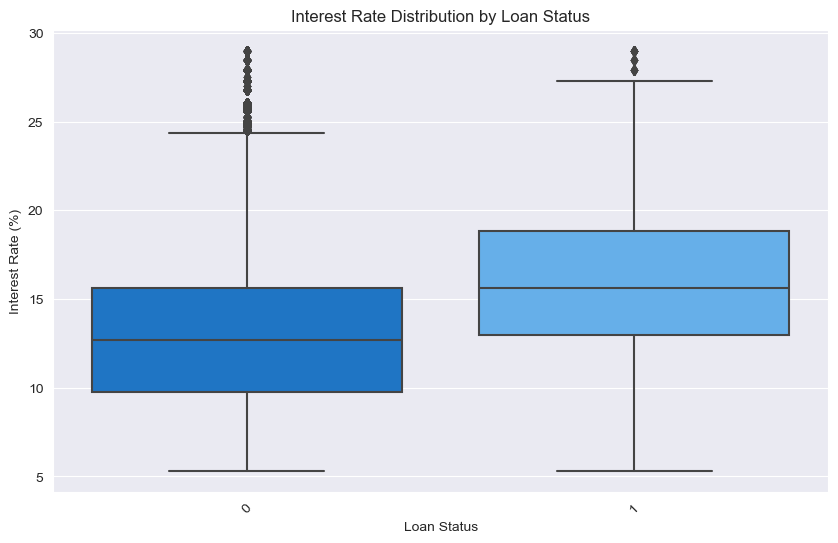

In [56]:
# Plot interest rate distribution by loan status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='loan_status', y='int_rate')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.title('Interest Rate Distribution by Loan Status')
plt.xticks(rotation=45)
plt.show()

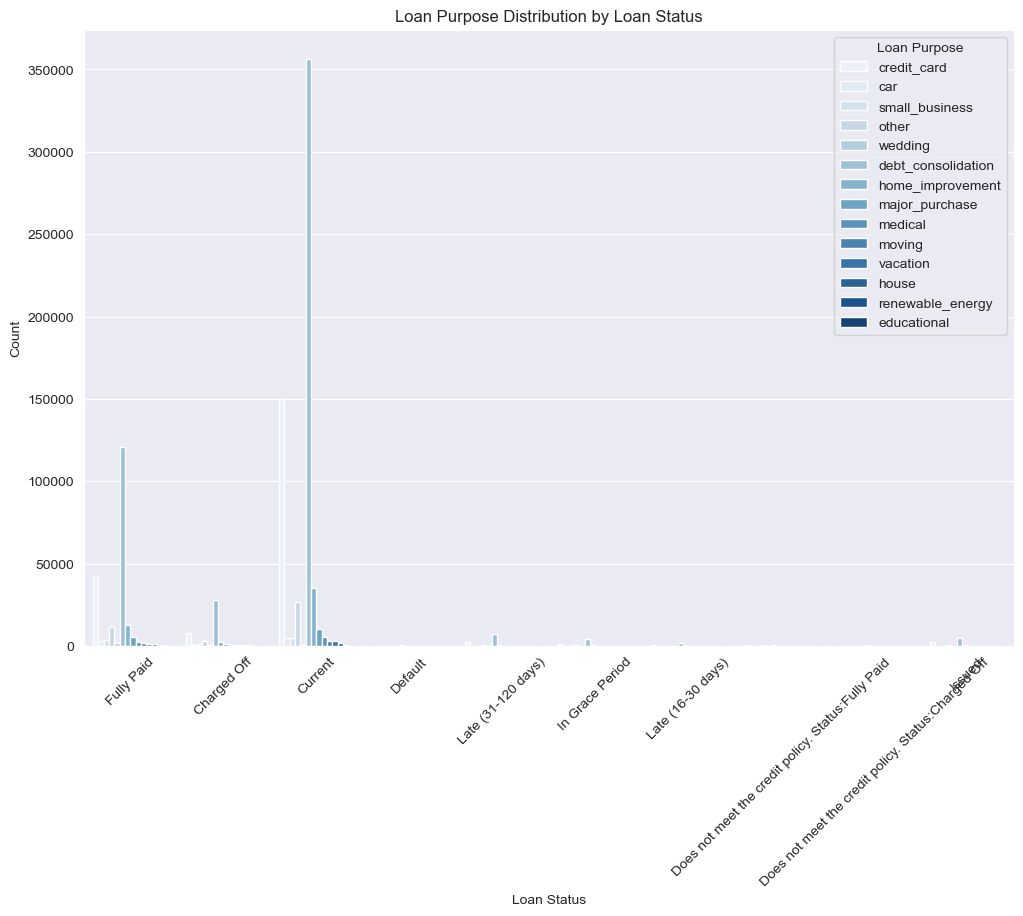

In [28]:

# Plot loan purpose distribution by loan status
plt.figure(figsize=(12, 8))
sns.countplot(data=df_legacy, x='loan_status', hue='purpose', palette='Blues')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Purpose Distribution by Loan Status')
plt.xticks(rotation=45)
plt.legend(title='Loan Purpose', bbox_to_anchor=(1, 1))
plt.show()

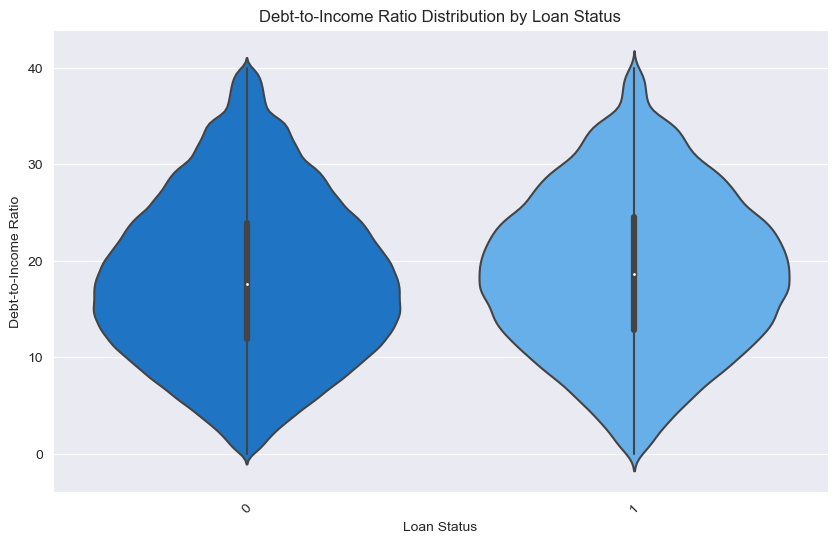

In [29]:
# Plot debt-to-income ratio distribution by loan status
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='loan_status', y='dti')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio')
plt.title('Debt-to-Income Ratio Distribution by Loan Status')
plt.xticks(rotation=45)
plt.show()

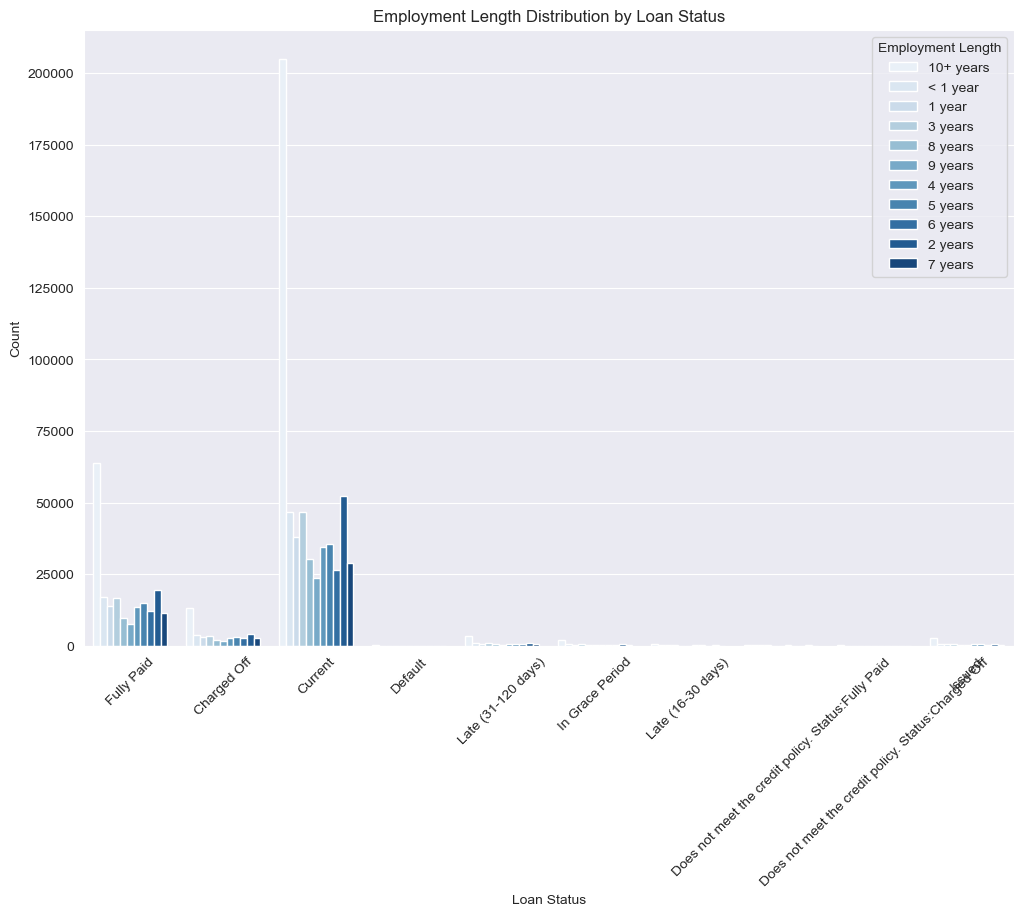

In [30]:

# Plot employment length distribution by loan status
plt.figure(figsize=(12, 8))
sns.countplot(data=df_legacy, x='loan_status', hue='emp_length', palette='Blues')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Employment Length Distribution by Loan Status')
plt.xticks(rotation=45)
plt.legend(title='Employment Length', bbox_to_anchor=(1, 1))
plt.show()

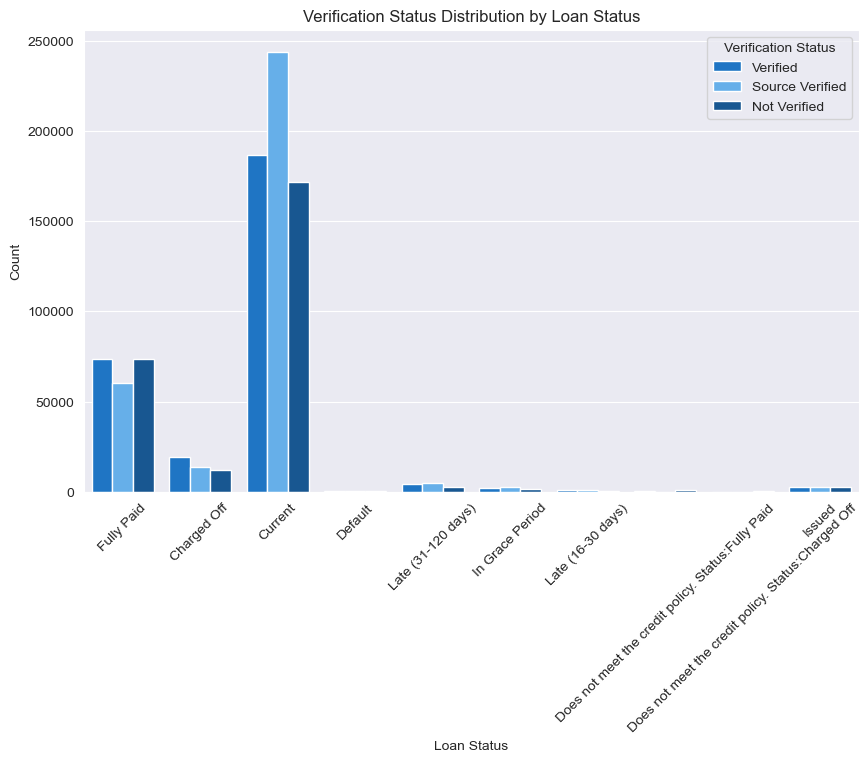

In [31]:
# Plot verification status distribution by loan status
plt.figure(figsize=(10, 6))
sns.countplot(data=df_legacy, x='loan_status', hue='verification_status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Verification Status Distribution by Loan Status')
plt.xticks(rotation=45)
plt.legend(title='Verification Status', bbox_to_anchor=(1, 1))
plt.show()

/var/folders/97/w7m6hrnj5lldx6gxjw172mnm0000gn/T/ipykernel_57177/1711345951.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['int_rate'], kde=True, palette=colors[3])
/Users/yelf/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


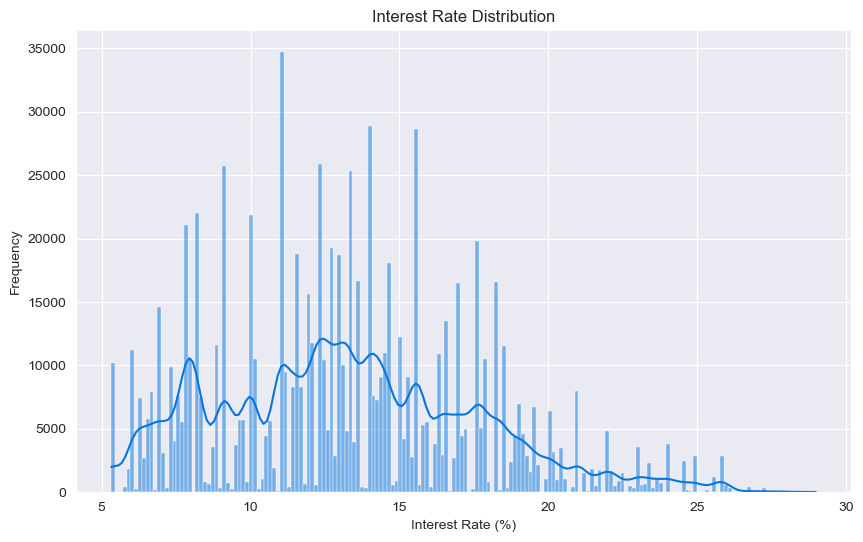

In [5]:
# Plot interest rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['int_rate'], kde=True, palette=colors[3])
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.title('Interest Rate Distribution')
plt.show()

/var/folders/97/w7m6hrnj5lldx6gxjw172mnm0000gn/T/ipykernel_31278/1148098467.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='annual_inc', kde=True, palette=colors[2])
/Users/yelf/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


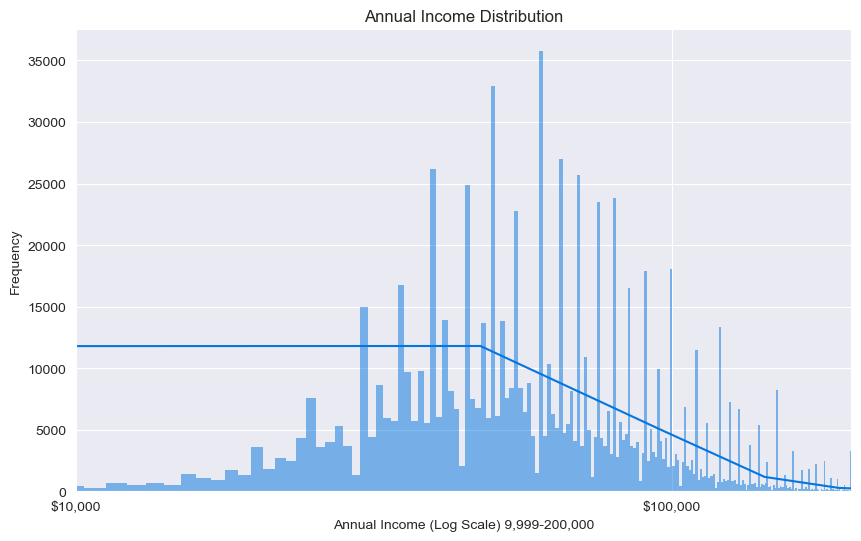

In [33]:
# Plot annual income distribution with logarithmic x-axis and smaller range
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='annual_inc', kde=True, palette=colors[2])
plt.xlabel('Annual Income (Log Scale) 9,999-200,000')
plt.ylabel('Frequency')
plt.title('Annual Income Distribution')
plt.xscale('log')
# Set the limits of the x-axis to the desired range
plt.xlim(9999, 200000)  # Adjust the limits according to your desired range
# Format x-axis ticks to display currency format
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '${:,.0f}'.format(x)))

plt.show()

/Users/yelf/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


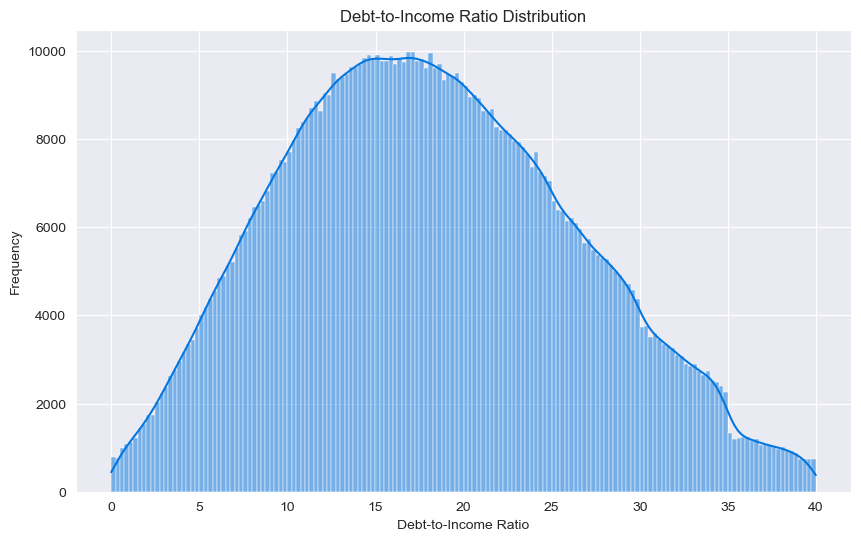

In [34]:
# Plot debt-to-income ratio distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['dti'], kde=True)
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.title('Debt-to-Income Ratio Distribution')
plt.show()

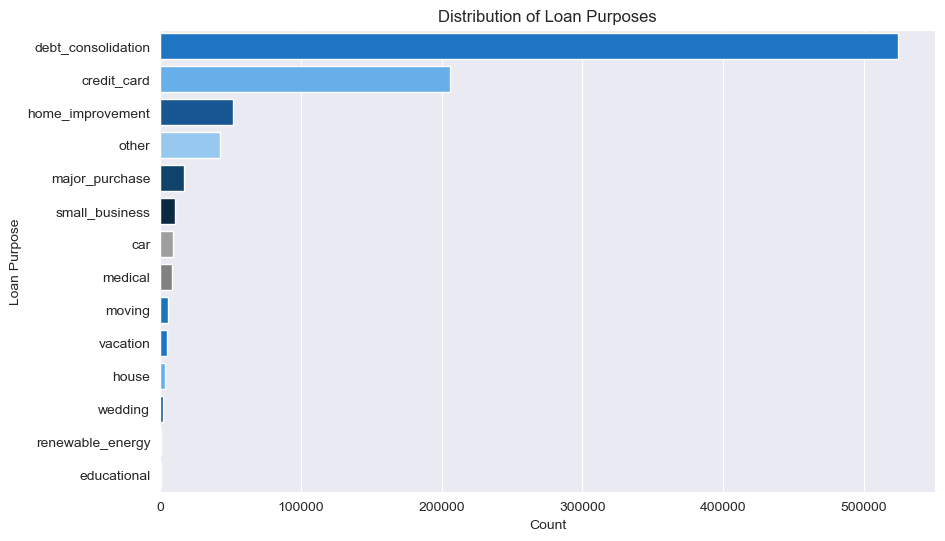

In [35]:
# Plot loan purpose distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_legacy, y='purpose', order=df_legacy['purpose'].value_counts().index, palette=colors)
plt.xlabel('Count')
plt.ylabel('Loan Purpose')
plt.title('Distribution of Loan Purposes')
plt.show()

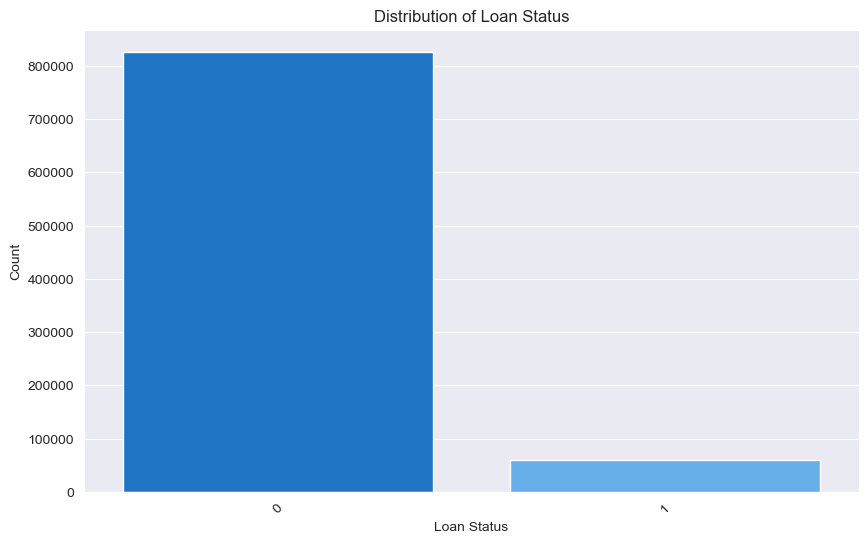

In [36]:
# Plot loan status distribution (target variable)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan_status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.xticks(rotation=45)
plt.show()

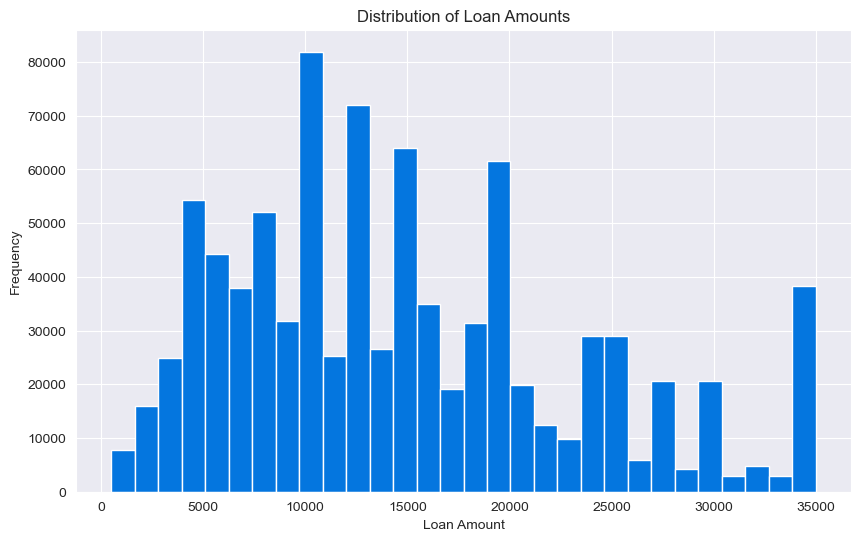

In [37]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['loan_amnt'], bins=30, color=colors[0], edgecolor='white')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts')
plt.show()

loan_amnt
10000.0    61811
12000.0    50162
15000.0    47177
20000.0    46884
35000.0    36309
           ...  
550.0          1
925.0          1
750.0          1
725.0          1
950.0          1
Name: count, Length: 1372, dtype: int64

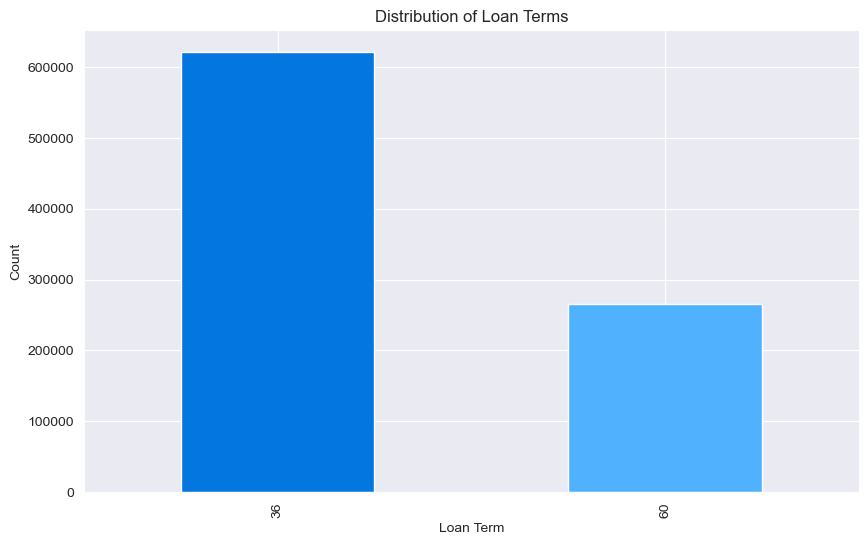

In [38]:
# Bar Chart
plt.figure(figsize=(10, 6))
df['term'].value_counts().sort_index().plot(kind='bar', color=[colors[0], colors[1]])  # Specify two colors
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.title('Distribution of Loan Terms')
plt.show()

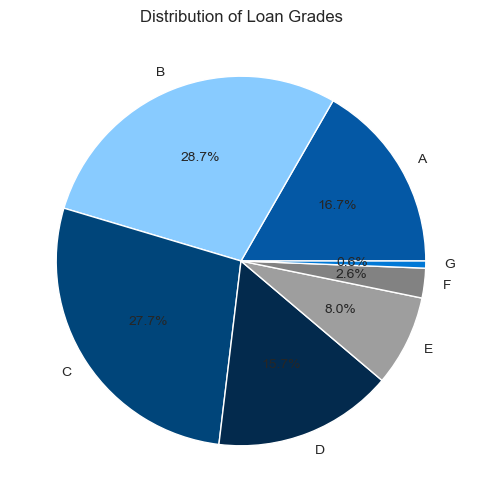

In [39]:
# Pie Chart
plt.figure(figsize=(10, 6))
grade_counts = df_legacy['grade'].value_counts()
grade_order = sorted(grade_counts.index)
grade_counts.loc[grade_order].plot(kind='pie', autopct='%1.1f%%', colors=colors[2:])
plt.title('Distribution of Loan Grades')
plt.ylabel('')
plt.show()

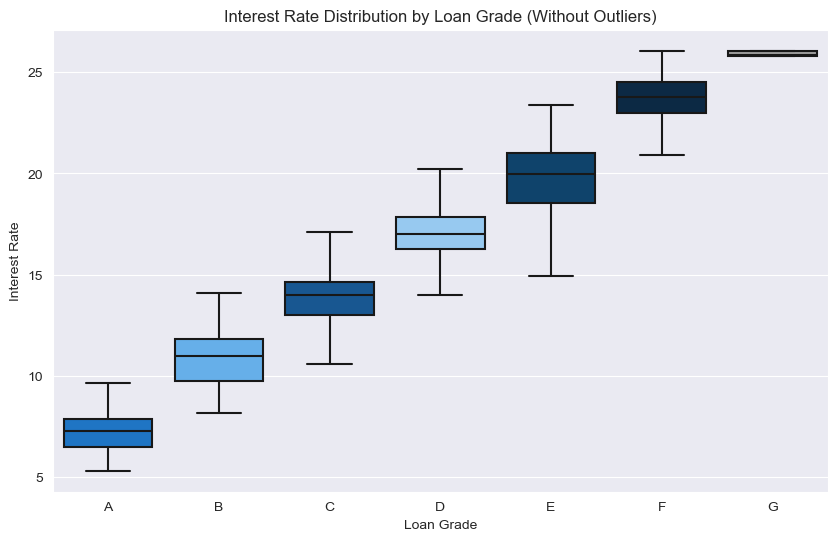

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_legacy['grade'], y=df_legacy['int_rate'], order=['A','B','C','D','E','F','G'], showfliers=False)
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate')
plt.title('Interest Rate Distribution by Loan Grade (Without Outliers)')
plt.show()

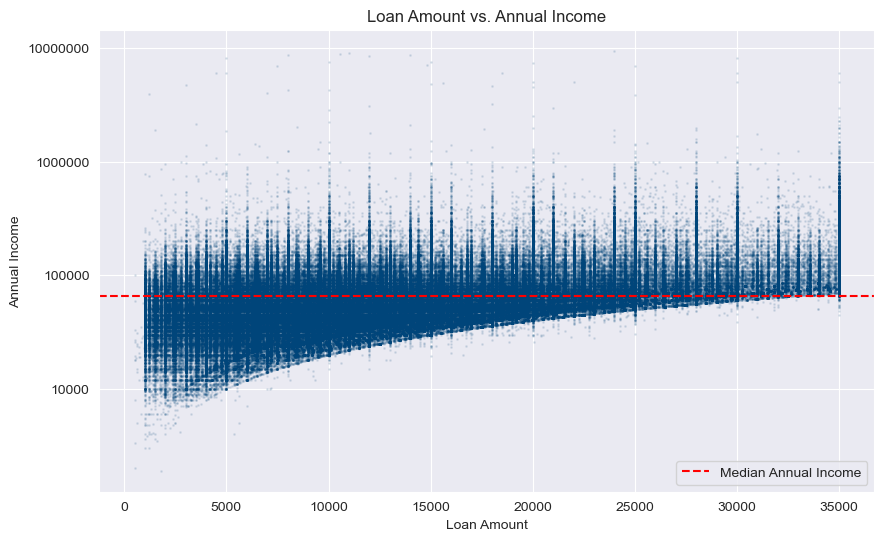

In [41]:

# Scatterplot with plt.scatter
plt.figure(figsize=(10, 6))
plt.scatter(x=df['loan_amnt'], y=df['annual_inc'], alpha=0.1, color=colors[4], s=1)
plt.xlabel('Loan Amount')
plt.ylabel('Annual Income')
plt.title('Loan Amount vs. Annual Income')
plt.yscale('log')
median_annual_inc = df['annual_inc'].median()
plt.axhline(y=median_annual_inc, color='red', linestyle='--', label='Median Annual Income')
formatter = ScalarFormatter()
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend()
plt.show()

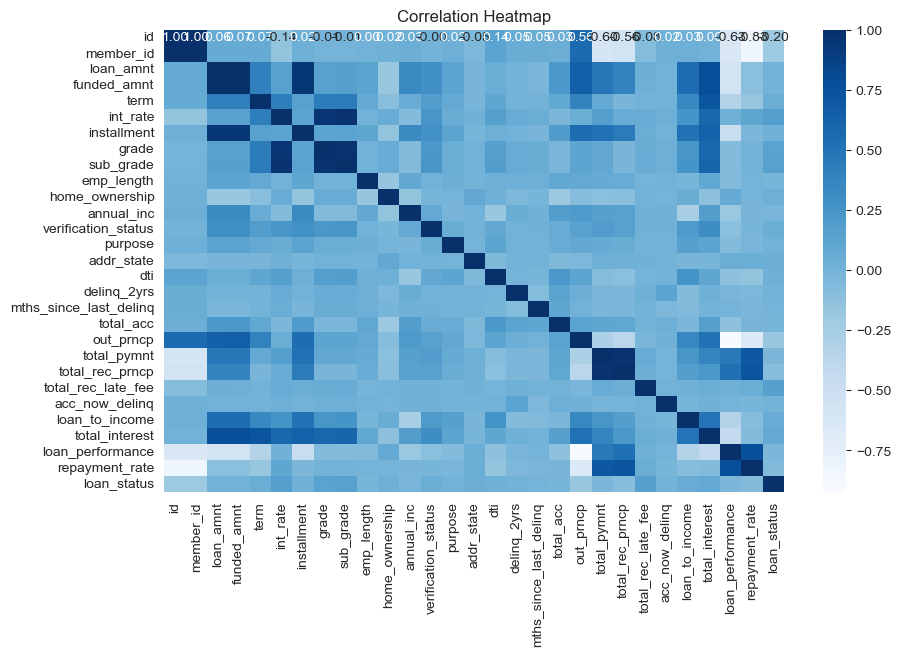

In [42]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1000x600 with 0 Axes>

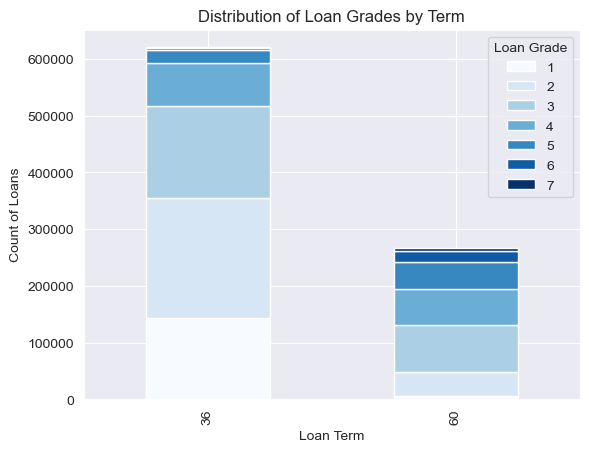

In [13]:

# Stacked Bar Chart
plt.figure(figsize=(10, 6))
stacked_df_indv = df.groupby(['term', 'grade']).size().unstack()
stacked_df_indv.plot(kind='bar', stacked=True, cmap='Blues')
plt.xlabel('Loan Term')
plt.ylabel('Count of Loans')
plt.title('Distribution of Loan Grades by Term')
plt.legend(title='Loan Grade')
plt.show()


<Figure size 1000x600 with 0 Axes>

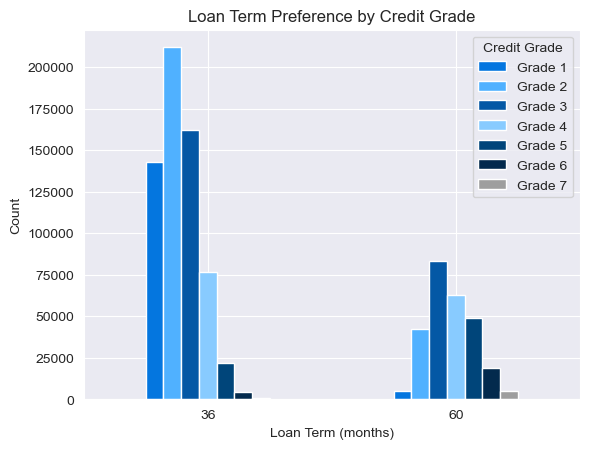

In [32]:
grouped = df.groupby(['term', 'grade']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))

# Creating the countplot
ax = grouped.plot(kind='bar', stacked=False)

# Adding legend
ax.legend(title='Credit Grade', labels=['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7'], loc='upper right')

plt.title('Loan Term Preference by Credit Grade')
plt.xlabel('Loan Term (months)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_pymnt,total_rec_prncp,total_rec_late_fee,acc_now_delinq,loan_to_income,total_interest,loan_performance,repayment_rate,dti_month,loan_status
1,2500.0,2500.0,60,15.27,59.83,3,14,0,1,30000.0,...,1008.71,456.46,0.0,0.0,0.08,1908.75,-1491.29,0.40,0.024,1
8,5600.0,5600.0,60,21.28,152.39,6,27,4,2,40000.0,...,646.02,162.02,0.0,0.0,0.14,5958.40,-4953.98,0.12,0.046,1
9,5375.0,5375.0,60,12.69,121.45,2,10,0,1,15000.0,...,1476.19,673.48,0.0,0.0,0.36,3410.44,-3898.81,0.27,0.097,1
27,5000.0,5000.0,60,16.77,123.65,4,17,2,1,50004.0,...,1609.12,629.05,0.0,0.0,0.10,4192.50,-3390.88,0.32,0.030,1
55,21000.0,21000.0,60,19.91,555.33,5,24,7,1,50000.0,...,18319.14,8990.81,0.0,0.0,0.42,20905.50,-2680.86,0.87,0.133,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886682,11200.0,11200.0,60,19.99,296.67,5,23,3,1,80000.0,...,1174.24,451.51,0.0,0.0,0.14,11194.40,-10025.76,0.10,0.045,1
886764,29675.0,29675.0,60,13.66,685.27,3,13,11,2,62000.0,...,2696.04,1413.79,0.0,0.0,0.48,20268.03,-26978.96,0.09,0.133,1
886779,35000.0,35000.0,60,24.99,1027.10,6,29,8,-1,98000.0,...,9355.14,913.44,0.0,0.0,0.36,43732.50,-25644.86,0.27,0.126,1
886811,10000.0,10000.0,60,23.99,287.63,6,27,2,1,35000.0,...,2577.01,853.57,15.0,0.0,0.29,11995.00,-7422.99,0.26,0.099,1


,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_pymnt,total_rec_prncp,total_rec_late_fee,acc_now_delinq,loan_to_income,total_interest,loan_performance,repayment_rate,dti_month,loan_status
12,9000.0,9000.0,36,13.49,305.38,3,11,0,1,30000.0,...,2270.70,1256.14,0.0,0.0,0.30,3642.30,-6729.30,0.25,0.122,1
14,10000.0,10000.0,36,10.65,325.74,2,7,3,1,100000.0,...,7471.99,5433.47,0.0,0.0,0.10,3195.00,-2528.01,0.75,0.039,1
21,21000.0,21000.0,36,12.42,701.73,2,9,11,1,105000.0,...,14025.40,10694.96,0.0,0.0,0.20,7824.60,-6974.60,0.67,0.080,1
24,6000.0,6000.0,36,11.71,198.46,2,8,1,1,76000.0,...,2050.14,1305.58,0.0,0.0,0.08,2107.80,-3949.86,0.34,0.031,1
26,15000.0,15000.0,36,14.27,514.64,3,12,9,1,60000.0,...,0.00,0.00,0.0,0.0,0.25,6421.50,-15000.00,0.00,0.103,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886797,2725.0,2725.0,36,17.86,98.33,4,20,0,-1,47784.0,...,590.89,359.21,0.0,0.0,0.06,1460.05,-2134.11,0.22,0.025,1
886819,14000.0,14000.0,36,15.99,492.13,4,17,5,-1,69000.0,...,3420.04,2226.49,0.0,0.0,0.20,6715.80,-10579.96,0.24,0.086,1
886834,28000.0,28000.0,36,15.59,978.74,4,16,3,1,120000.0,...,8760.16,5831.27,0.0,0.0,0.23,13095.60,-19239.84,0.31,0.098,1
886840,4200.0,4200.0,36,15.99,147.64,4,17,11,-1,48000.0,...,1026.02,667.96,0.0,0.0,0.09,2014.74,-3173.98,0.24,0.037,1


Text(0.5, 1.0, 'Loan amounts grouped by purpose')

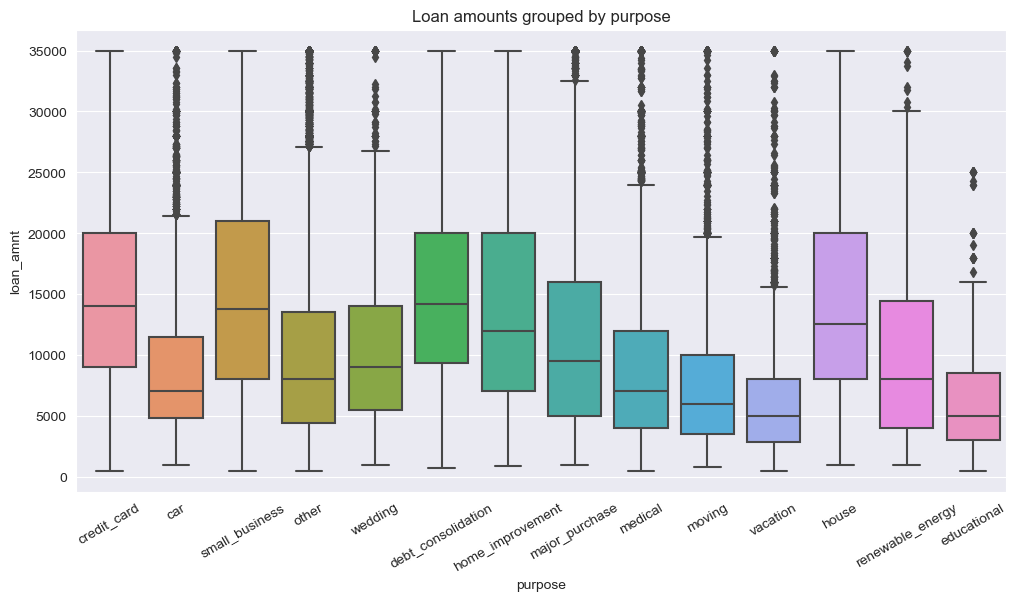

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x='purpose', y='loan_amnt', data=df_legacy)
plt.xticks(rotation=30)
plt.title('Loan amounts grouped by purpose')

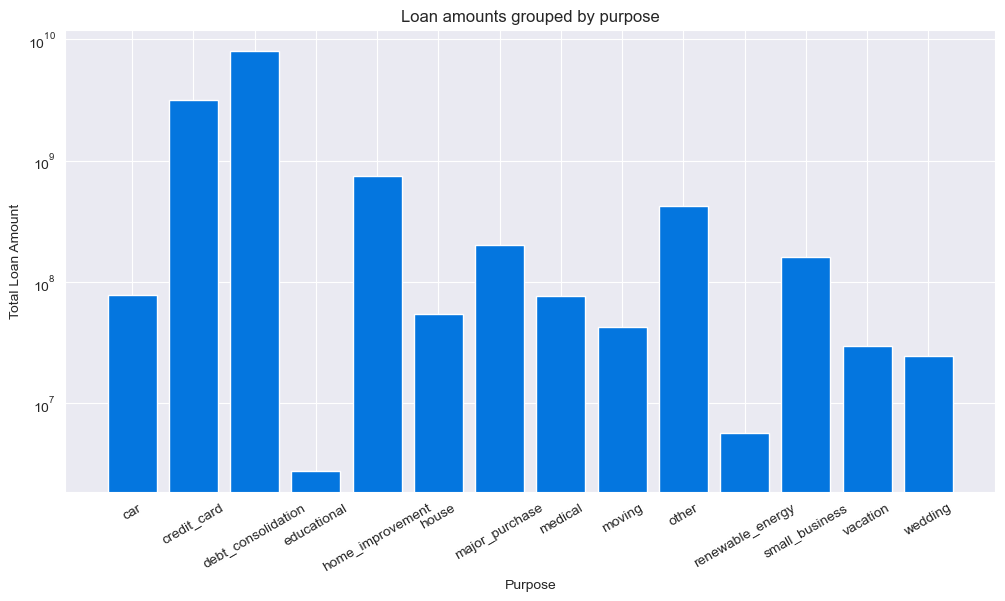

In [15]:

# Calculate total loan amounts for each purpose
total_loan_amounts = df_legacy.groupby('purpose')['loan_amnt'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.bar(total_loan_amounts['purpose'], total_loan_amounts['loan_amnt'])
plt.xticks(rotation=30)
plt.title('Loan amounts grouped by purpose')
plt.ylabel('Total Loan Amount')
plt.yscale('log')
plt.xlabel('Purpose')
plt.show()


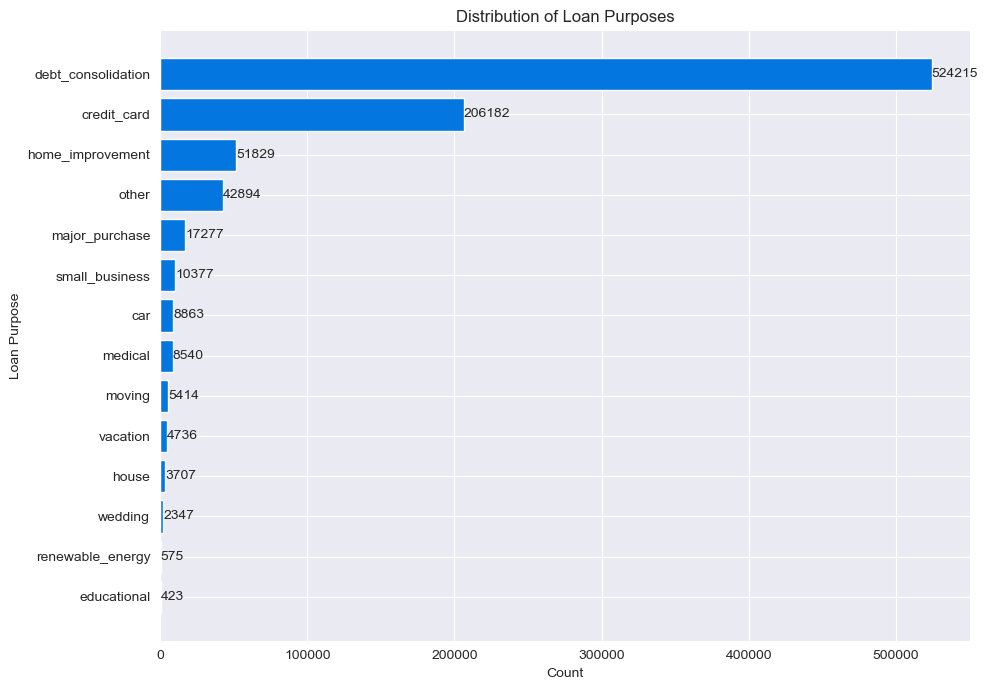

In [26]:

order = df_legacy['purpose'].value_counts().index[::-1]

plt.figure(figsize=(10, 7))

# Create countplot with sorted data
bars = plt.barh(order, df_legacy['purpose'].value_counts()[order])

plt.xlabel('Count')
plt.ylabel('Loan Purpose')
plt.title('Distribution of Loan Purposes')

# Add counts on top of bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', 
             va='center', ha='left')

plt.tight_layout()
plt.savefig('Loan_Purpose_Distribution.png')
plt.show()


In [12]:
"""
Model_Demo.py file to demonstrate the prediction of the best trained model
"""
import time
from typing import Any
import seaborn as sns
import mlflow
import pandas as pd
from pandas import DataFrame
from sklearn.metrics import accuracy_score, f1_score, roc_curve, classification_report, precision_recall_curve, \
    roc_auc_score
from utils.log import LOGGER
import matplotlib.pyplot as plt
import xgboost as xgb



def get_processed_data() -> tuple[DataFrame, DataFrame, Any]:
    """
    Load the data and split it into features and target column
    :return: Dataframe, features and target column
    """
    LOGGER.info('Reading data...')
    df = pd.read_csv('../data/cleaned_data.csv', low_memory=False)
    y = df['loan_status']
    X = df.drop('loan_status', axis=1)
    return df, X, y


def get_model_and_predict(X: pd.DataFrame) -> tuple[int | Any, Any, Any]:
    """
    Load the best trained model from mlflow and predict the probability of default
    :param X: Features DataFrame
    :return: probabilities, predictions and the model
    """
    LOGGER.info('Model is predicting...')
    mlflow.set_tracking_uri("http://127.0.0.1:5000")
    logged_model = 'runs:/8510bb96364e476da1d5a4960623d6da/xgboost_model'
    loaded_model = mlflow.xgboost.load_model(logged_model)
    probas = loaded_model.predict_proba(pd.DataFrame(X))
    preds = loaded_model.predict(pd.DataFrame(X))
    probas = probas * 100
    return probas, preds, loaded_model


def add_save_predictions(probas, df: pd.DataFrame):
    """
    Add probablility of default to the source dataframe
    :param probas: predicted probabilities of the model
    :param df: source Dataframe
    :return:
    """
    df["prediction"] = probas[:, 1]
    df["prediction"] = round(df["prediction"], 2)
    savepath = 'data/predicted_data.csv'
    df.to_csv('../data/predicted_data.csv', index=False)
    LOGGER.info(f'Dataset with a Predictions column as Probability of Default saved in {savepath}')


def calculate_metrics(probas, preds, y):
    """
    Calculate the accuracy, F1 score and ROC_AUC as well as classification report
    :param probas: predicted probabilities of the model
    :param preds: binary predictions of the model
    :param y: target column
    :return:
    """
    LOGGER.info('Calculating metrics...')
    probas_positive = probas[:, 1]

    # Calculate the best ROC AUC score using the best threshold
    roc_auc_best = roc_auc_score(y, probas_positive)
    accuracy = accuracy_score(y, preds)
    f1 = f1_score(y, preds)

    print(f'The trained XGBoost model achieved an accuracy of {accuracy * 100:.2f}%')
    print(f'The trained XGBoost model achieved an F1 score of {f1 * 100:.2f}%')
    print(f'The trained XGBoost model achieved an ROC AUC score of {roc_auc_best * 100:.2f}%')
    time.sleep(6)
    print('\nClassification Report:')
    print(classification_report(y, preds))


def plot_roc_curve(y_test, probas):
    """
    Plot the roc auc curve of the model
    :param y_test: test target column
    :param probas: predicted probabilities of the model
    :return:
    """
    colors = ['#0476df', '#50b1ff', '#0458a5', '#88cbff', '#00457a', '#032a4d', '#9e9e9e', '#828282', '#0078d6']
    sns.set_palette(sns.color_palette(colors))
    fpr, tpr, _ = roc_curve(y_test, probas)
    plt.figure()
    plt.plot(fpr, tpr, lw=2)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()


def plot_precision_recall_curve(y_test, probas):
    """
    Plot the precision recall curve of the model
    :param y_test: test target column
    :param probas: predicted probabilities of the model
    :return:
    """
    colors = ['#0476df', '#50b1ff', '#0458a5', '#88cbff', '#00457a', '#032a4d', '#9e9e9e', '#828282', '#0078d6']
    sns.set_palette(sns.color_palette(colors))
    precision, recall, _ = precision_recall_curve(y_test, probas)
    plt.plot(recall, precision, lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()



def plot_probability_distribution(probas):
    """
    Plot the probability distribution
    :param probas: predicted probabilities of the model
    :return:
    """
    colors = ['#0476df', '#50b1ff', '#0458a5', '#88cbff', '#00457a', '#032a4d', '#9e9e9e', '#828282', '#0078d6']
    sns.set_palette(sns.color_palette(colors))
    plt.hist(probas[:, 1], bins=10, alpha=0.7)
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.title('Probability Distribution Histogram')
    plt.show()


def feature_importance(model):
    """
    Calculate the feature importances
    :param model: used xgboost model
    :return:
    """
    colors = ['#0476df', '#50b1ff', '#0458a5', '#88cbff', '#00457a', '#032a4d', '#9e9e9e', '#828282', '#0078d6']
    sns.set_palette(sns.color_palette(colors))
    xgb.plot_importance(model)
    plt.show()


def predict():
    """
    Predict loan default probability using xgboost model
    :return:
    """
    LOGGER.info('Model demo starting...')
    time.sleep(5)
    df, X, y = get_processed_data()
    probas, preds, loaded_model = get_model_and_predict(X)
    add_save_predictions(probas, df)
    calculate_metrics(probas, preds, y)
    plot_roc_curve(y, probas[:, 1])
    plot_precision_recall_curve(y, probas[:, 1])
    plot_probability_distribution(probas)
    feature_importance(loaded_model)
    LOGGER.info('Model Demo Completed.')



In [6]:
df, X, y = get_processed_data()
probas, preds, loaded_model = get_model_and_predict(X)

2024-03-29 13:25:45,411 INFO -- Reading data...
2024-03-29 13:25:47,170 INFO -- Model is predicting...


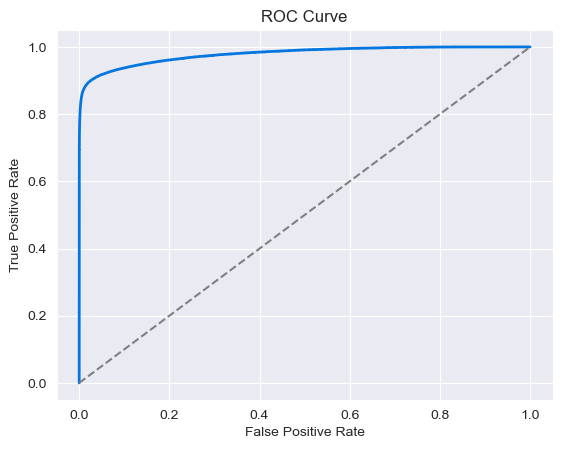

In [13]:
plot_roc_curve(y, probas[:, 1])

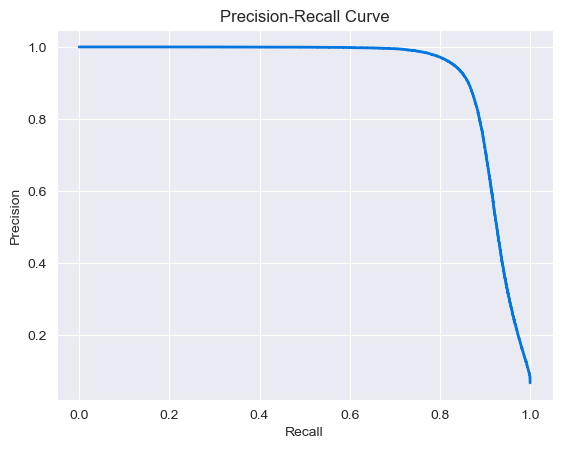

In [14]:
plot_precision_recall_curve(y, probas[:, 1])

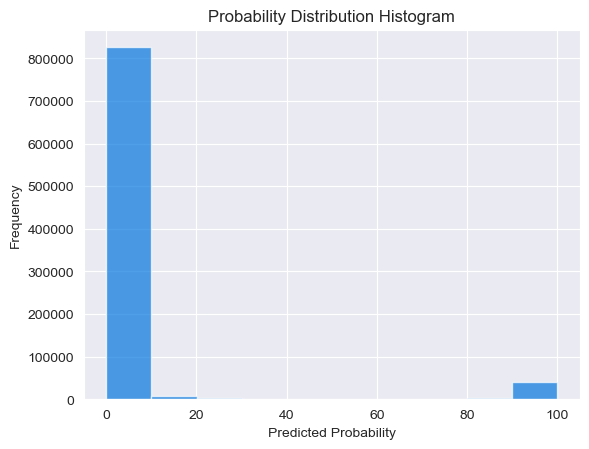

In [15]:
plot_probability_distribution(probas)


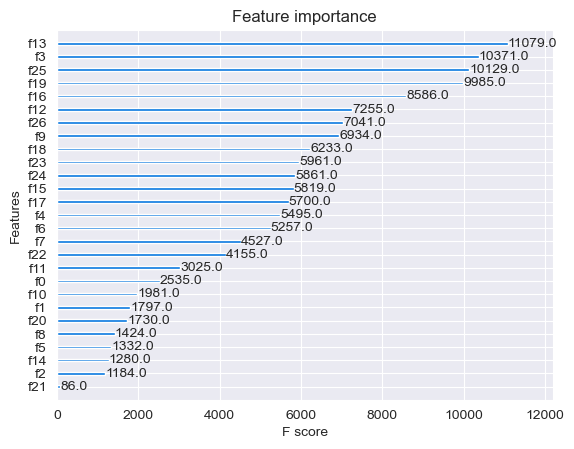

In [16]:
feature_importance(loaded_model)

<Figure size 1000x700 with 0 Axes>

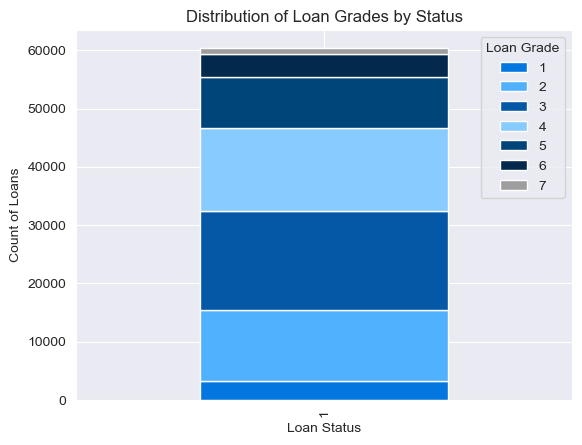

In [20]:

# Filter dataframe where loan_status == 1
filtered_df = df[df['loan_status'] == 1]

plt.figure(figsize=(10, 7))

# Group and unstack the filtered dataframe
stacked_df_indv = filtered_df.groupby(['loan_status', 'grade']).size().unstack()

# Plot the stacked bar chart
stacked_df_indv.plot(kind='bar', stacked=True)

plt.xlabel('Loan Status')
plt.ylabel('Count of Loans')
plt.title('Distribution of Loan Grades by Status')
plt.legend(title='Loan Grade')
plt.savefig('Loan_Grades_by_Term.png')
plt.show()


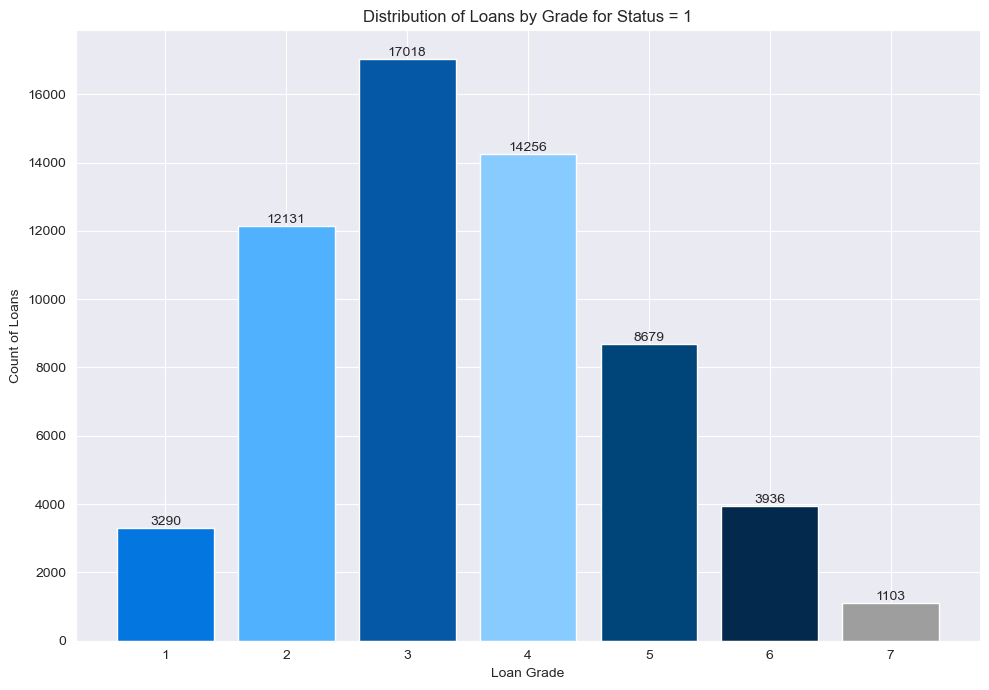

In [30]:
# Filter dataframe where loan_status == 1
filtered_df = df[df['loan_status'] == 1]

plt.figure(figsize=(10, 7))

# Calculate count of loans with loan_status == 1 for each grade
loan_count_by_grade = filtered_df['grade'].value_counts().sort_index()

# Create bar chart
bars = plt.bar(loan_count_by_grade.index, loan_count_by_grade.values, color=colors)

plt.xlabel('Loan Grade')
plt.ylabel('Count of Loans')
plt.title('Distribution of Loans by Grade for Status = 1')

# Add counts on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{int(bar.get_height())}', 
             va='bottom', ha='center')

plt.tight_layout()
plt.savefig('Loan_Grades_by_Status_1.png')
plt.show()


In [31]:
 calculate_metrics(probas, preds, y)


2024-03-29 15:12:07,682 INFO -- Calculating metrics...


The trained XGBoost model achieved an accuracy of 98.32%
The trained XGBoost model achieved an F1 score of 86.12%
The trained XGBoost model achieved an ROC AUC score of 97.84%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    826455
           1       0.98      0.77      0.86     60413

    accuracy                           0.98    886868
   macro avg       0.98      0.88      0.93    886868
weighted avg       0.98      0.98      0.98    886868


Text(0.5, 1.0, 'Installments by Grade')

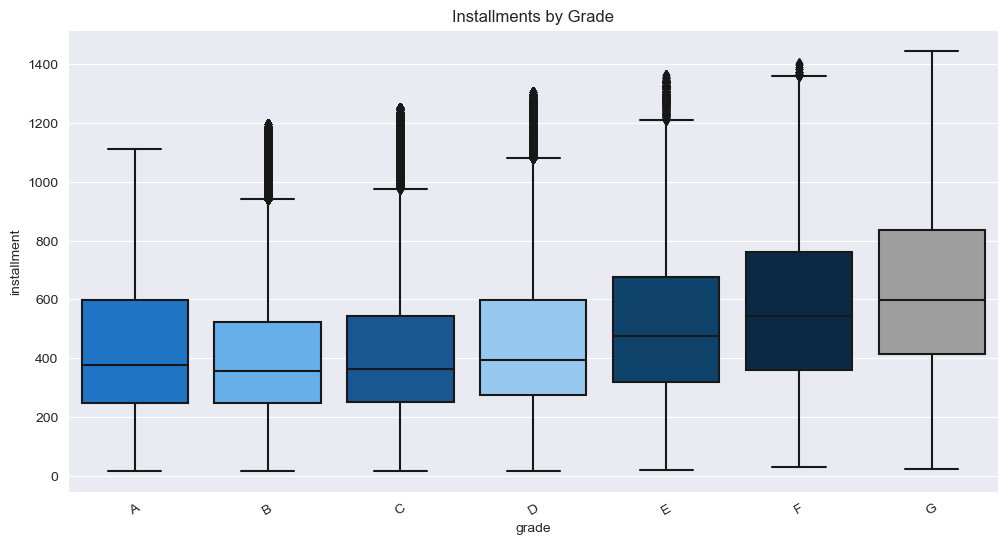

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(x='grade', y='installment',order=['A','B','C','D','E','F','G'], data=df_legacy)
plt.xticks(rotation=30)
plt.title('Installments by Grade')

/Users/yelf/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yelf/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


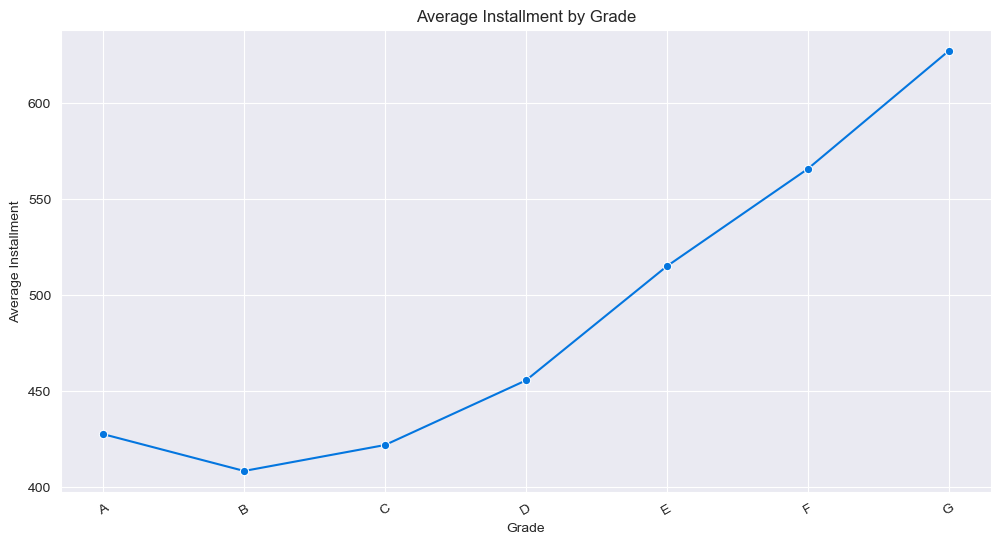

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average installment by grade
avg_installment_by_grade = df_legacy.groupby('grade')['installment'].mean().reset_index()

# Plot the line chart
plt.figure(figsize=(12,6))
sns.lineplot(x='grade', y='installment', data=avg_installment_by_grade, marker='o', sort=False)
plt.title('Average Installment by Grade')
plt.xlabel('Grade')
plt.ylabel('Average Installment')
plt.xticks(rotation=30)
plt.grid(True)
plt.show()


/Users/yelf/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yelf/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


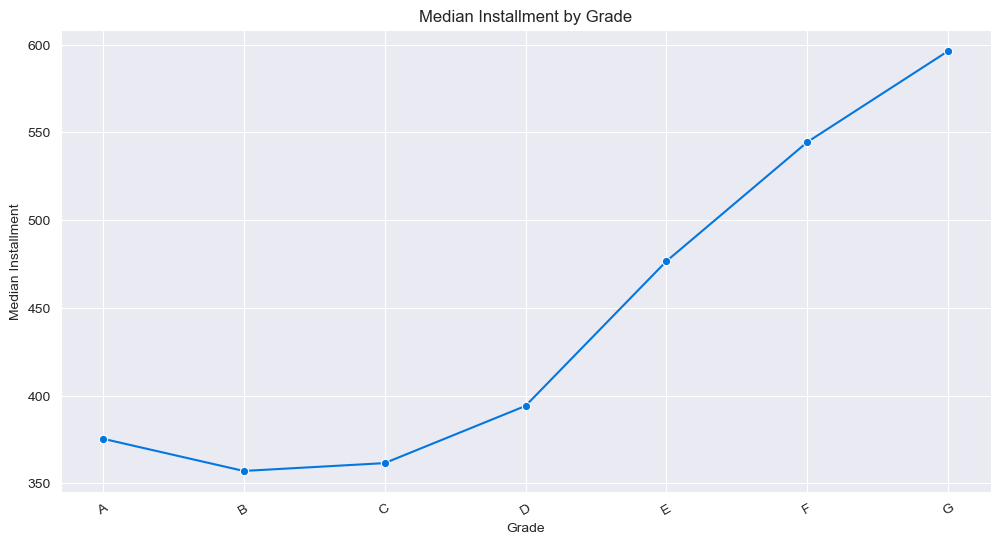

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate median installment by grade
median_installment_by_grade = df_legacy.groupby('grade')['installment'].median().reset_index()

# Plot the line chart
plt.figure(figsize=(12,6))
sns.lineplot(x='grade', y='installment', data=median_installment_by_grade, marker='o', sort=False)
plt.title('Median Installment by Grade')
plt.xlabel('Grade')
plt.ylabel('Median Installment')
plt.xticks(rotation=30)
plt.grid(True)
plt.show()


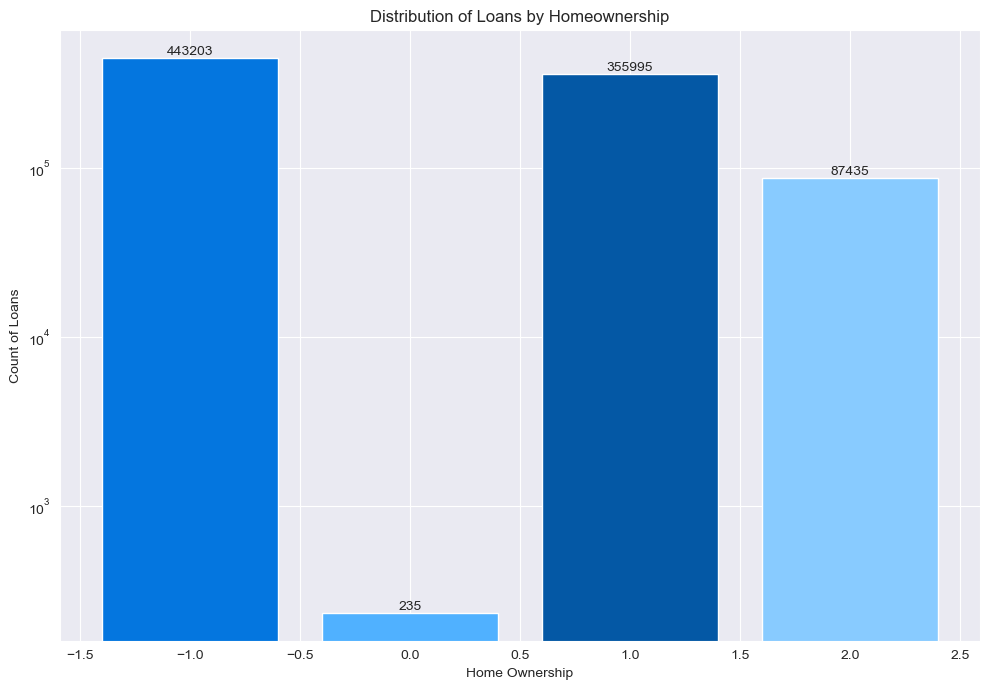

In [42]:
# Filter dataframe where loan_status == 1

plt.figure(figsize=(10, 7))

# Calculate count of loans with loan_status == 1 for each grade
loan_count_by_grade = df['home_ownership'].value_counts().sort_index()

# Create bar chart
bars = plt.bar(loan_count_by_grade.index, loan_count_by_grade.values, color=colors)

plt.xlabel('Home Ownership')
plt.yscale('log')
plt.ylabel('Count of Loans')
plt.title('Distribution of Loans by Homeownership')

# Add counts on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{int(bar.get_height())}', 
             va='bottom', ha='center')

plt.tight_layout()

plt.show()


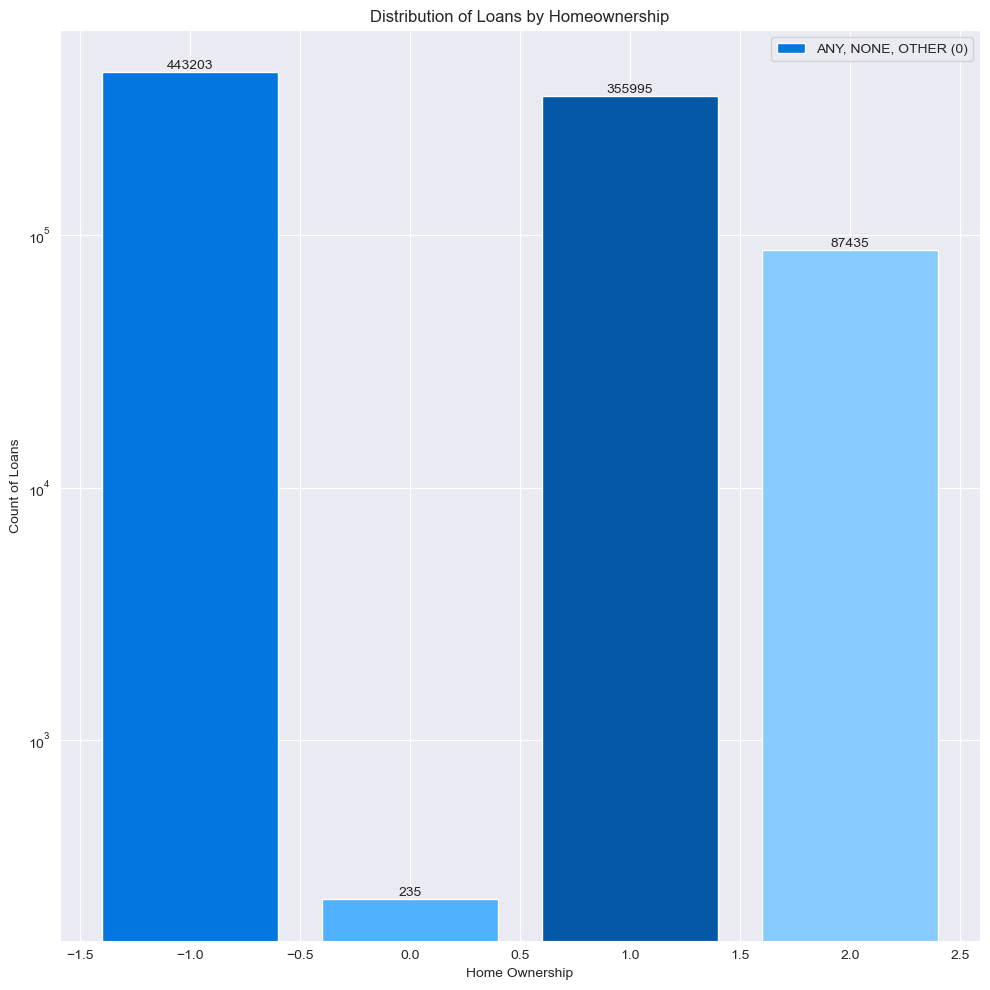

In [46]:

plt.figure(figsize=(10, 10))

# Calculate count of loans with loan_status == 1 for each home ownership
loan_count_by_home_ownership = df['home_ownership'].value_counts().sort_index()

# Create bar chart
bars = plt.bar(loan_count_by_home_ownership.index, loan_count_by_home_ownership.values, color=colors)

plt.xlabel('Home Ownership')
plt.yscale('log')
plt.ylabel('Count of Loans')
plt.title('Distribution of Loans by Homeownership')

# Add counts on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{int(bar.get_height())}', 
             va='bottom', ha='center')

# Add legend
plt.legend(labels=['ANY, NONE, OTHER (0)', 'MORTGAGE (-1)', 'OWN (2)', 'RENT (1)'], loc='upper right')

plt.tight_layout()

plt.show()


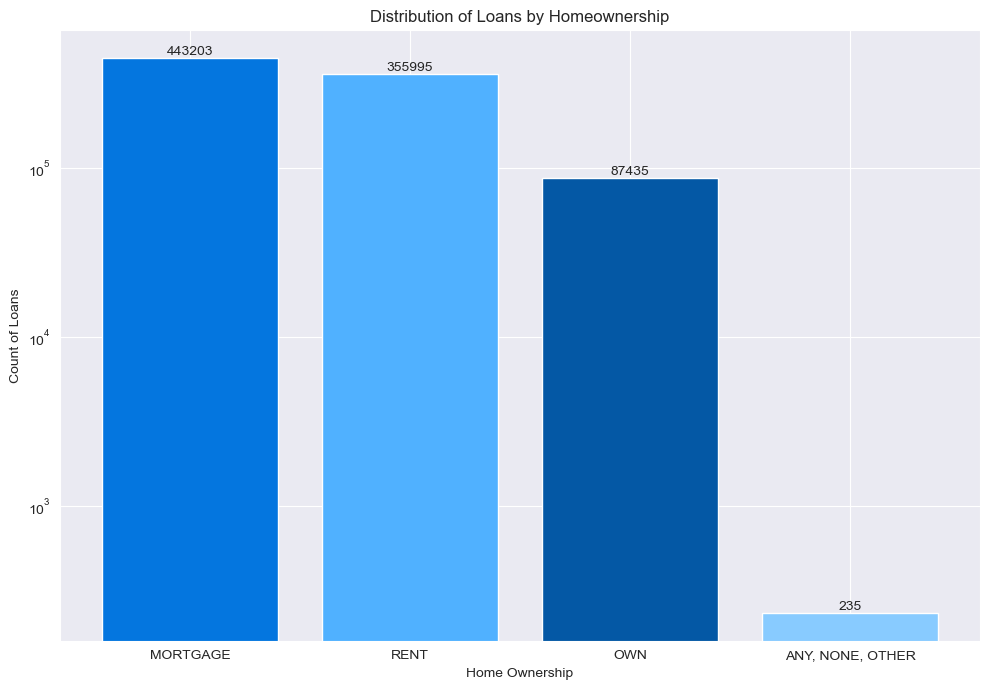

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Mapping for home_ownership
home_ownership_mapping = {
    0: 'ANY, NONE, OTHER',
    1: 'RENT',
    -1: 'MORTGAGE',
    2: 'OWN'
}

# Map home_ownership column
df['home_ownership'] = df['home_ownership'].map(home_ownership_mapping)

plt.figure(figsize=(10, 7))

# Calculate count of loans for each home_ownership
loan_count_by_home_ownership = df['home_ownership'].value_counts().sort_values(ascending=False)


# Create bar chart
bars = plt.bar(loan_count_by_home_ownership.index, loan_count_by_home_ownership.values, color=colors)

plt.xlabel('Home Ownership')
plt.yscale('log')
plt.ylabel('Count of Loans')
plt.title('Distribution of Loans by Homeownership')

# Add counts on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{int(bar.get_height())}', 
             va='bottom', ha='center')

plt.tight_layout()

plt.show()
